# **<center>Machine Learning and Finance </center>**


## <center> Coursework </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/MLF/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1-bWh9KsN0f7ZlgVKzrtvqHmcAYCKTSeK?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>



---
**Contact**

If you have any questions regarding this notebook, please do not hesitate to contact me at: h.madmoun@imperial.ac.uk

---
---
**Instructions:**

* The code should be presented as a python file or a jupyter notebook.

* The theoretical questions can be answered in the jupyter notebook or in a separate pdf.


---
---
**Presentation of the Coursework:**

In this coursework, we would like to introduce an interpretable Neural Network to handle the same classification problem introduced in [Programming Session 3](https://colab.research.google.com/drive/1UZDULRgUxqbkjSo-ZGJn15_URwRQDKVX?usp=sharing). 


The coursework is structured into three sections:

* In Section 1, we undertake data preprocessing, which involves scaling the numerical features and applying Label Encoding to the categorical features.
* In Section 2, we develop and train a model, as depicted in the following diagram:
<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1Aj7nc0QSS5hweGx_xPUbYH-5L6_2HRgz"></center>
* In Section 3, we adapt the model presented in Section 2 to address a sequential problem.


---
The coursework is graded out of 100. The following table presents the details of the grading scale used.

| Question | Number of Marks |
|----------|-----------------|
| Q1       | 3 marks         |
| Q2       | 3 marks         |
| Q3       | 3 marks         |
| Q4       | 3 marks         |
| Q5       | 3 marks         |
| Q6       | 3 marks         |
| Q7       | 3 marks         |
| Q8       | 6 marks         |
| Q9       | 3 marks         |
| Q10      | 3 marks         |
| Q11      | 3 marks         |
| Q12      | 3 marks         |
| Q13      | 3 marks         |
| Q14      | 3 marks         |
| Q15      | 3 marks         |
| Q16      | 3 marks         |
| Q17      | 3 marks         |
| Q18      | 3 marks         |
| Q19      | 4 marks         |
| Q20      | 3 marks         |
| Q21      | 4 marks         |
| Q22      | 3 marks         |
| Q23      | 4 marks         |
| Q24      | 4 marks         |
| Q25      | 4 marks         |
| Q26      | 4 marks         |
| Q27      | 3 marks         |
| Q28      | 10 marks        |

---

# Preprocessing the Data

### Load the Data

In [ ]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # as usual for plots
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense, Concatenate, Embedding, LayerNormalization, Dropout
from tensorflow.keras.metrics import AUC, Precision, Recall

In [ ]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Specify the path to your working directory
os.chdir("./gdrive/My Drive/Teaching/Imperial_College/Coursework/")

---
<font color=green>Q1:</font>
<br><font color='green'>
The data is stored in the folder "data". Load the dataframe and shuffle the rows, then display 5 random rows in the dataframe.
</font>

---

In [ ]:
## Import data


In [ ]:
## Shuffle the rows


In [ ]:
## Sample 5 random rows


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32050,25,103000,MORTGAGE,4.0,PERSONAL,A,29175,10.99,0,0.28,N,2
8264,39,91992,MORTGAGE,0.0,HOMEIMPROVEMENT,A,3350,5.42,0,0.04,N,11
14937,22,55000,RENT,5.0,DEBTCONSOLIDATION,A,6000,7.51,0,0.11,N,3
1846,22,60612,MORTGAGE,6.0,PERSONAL,B,5300,10.99,0,0.09,N,4
3076,22,68500,MORTGAGE,3.0,PERSONAL,B,12000,10.99,0,0.18,N,4


The data used in this coursework is the one we have used in Programming Session 3. In this dataset, each entry represents a person who takes a credit by a bank. 

The target is: `loan_status`. It takes two possible values:


* 1 in case of default.
* 0 otherwise.



---
<font color=green>Q2:</font>
<br><font color='green'>
Show that it is a binary classification problem and that the dataset is highly imbalanced.
</font>

---

In [ ]:
# Show it's a Binary Classification Problem


array([0, 1])

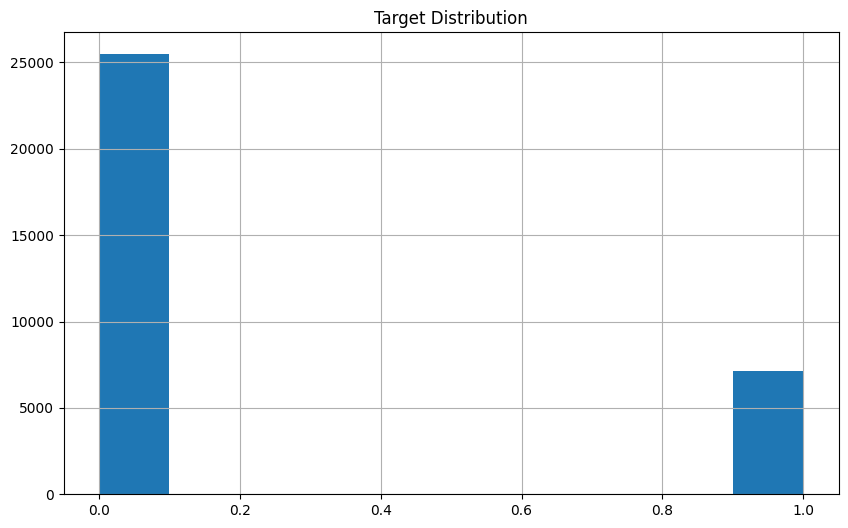

### Adding a categorical variable

---
<font color=green>Q3:</font>
<br><font color='green'>
Describe the way we created the categorical variable `category_income` in [Programming Session 3](https://colab.research.google.com/drive/1UZDULRgUxqbkjSo-ZGJn15_URwRQDKVX?usp=sharing).
Create the cateorical variable `category_income`. 
</font>

---

---
<font color=green>Q4:</font>
<br><font color='green'>
Print the number of categories associated with the categorical variable `loan_grade` and print the different categories.
</font>

---

The categorical variable loan_grade contains 7 categories
The different categories of the categorical variable loan_grade are:  ['B' 'A' 'C' 'D' 'E' 'F' 'G']


---
<font color=green>Q5:</font>
<br><font color='green'>
Create a list called `catvars` containing the 5 categorical variables.
Create a list called `cardinalities` containing the number of categories associated with each categorical variable in `catvars`.
</font>

---

The list categories contains the following elements:  ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'category_income']
The list cardinalities contains the following elements:  [4, 6, 7, 2, 4]


The following table shows the different categories for each categorical variable. 

| Categorical Variable      | Categories                                                                                        |
|---------------------------|---------------------------------------------------------------------------------------------------|
| person_home_ownership     | ['MORTGAGE', 'RENT', 'OWN', 'OTHER']                                                              |
| loan_intent               | ['DEBTCONSOLIDATION',   'PERSONAL',   'VENTURE',   'EDUCATION',   'MEDICAL',   'HOMEIMPROVEMENT'] |
| loan_grade                | ['A', 'C', 'B', 'E', 'D', 'G', 'F']                                                               |
| cb_person_default_on_file | ['N', 'Y']                                                                                        |
| category_income           | ['B', 'D', 'C', 'A']                                                                              |

---
<font color=green>Q6:</font>
<br><font color='green'>
Create a list called `numvars` containing the 7 numerical variables. Describe their distributions.
</font>

---

The numerical variables are:  ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [ ]:
# Description of the numerical variables distribution


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


### Preprocessing numerical and categorical variables

We'll begin by dividing the dataset into a training set and a test set. The training set will contain 70% of the data and will be used to train our model. The remaining 30% will form the test set and will be used to evaluate the performance of the model.

When dealing with categorical variables, it's important to remember that machine learning models are mathematical models and work with numbers. Therefore, these categories must be transformed into numbers before we can use them to fit and validate a model.

Consider a simple example where we have a categorical variable with three unique values: 'A', 'B', and 'C'.

Label Encoding would involve assigning each unique category value a unique integer. We could assign 'A' to '0', 'B' to '1', and 'C' to '2'. After encoding, our data will look like this:

| categorical_variable | Index  |
|-------|-------|
| A     | 0   |
| B     | 1   |
| C     | 2   |

This way, we have transformed our categorical data into numerical data, which makes it compatible for a machine learning algorithm.

In addition to this, machine learning algorithms perform better when input numerical variables fall within a similar scale. Therefore, we'll scale (normalize) our numerical variables so they all have a similar range of values. 





---
<font color=green>Q7:</font>
<br><font color='green'>
Describe two methods to scale the numerical variables. 
</font>

---





---
<font color=green>Q8:</font>
<br><font color='green'>
Split the dataset into training and test sets. 
Process all the categorical variables using Label Encoding. 
Scale the numerical variables using your preferred method.
Extract the training and test targets.
</font>

---

The following table summarizes the tensors you should create:

| Description of the Tensor                                                                                                       | Name        | Shape        |
|---------------------------------------------------------------------------------------------------------------------------------|-------------|--------------|
| The tensor containing all the numerical features associated with the training dataset                                           | X_num_train | $(N_T, D_n)$ |
| The tensor containing all the label encoded categorical features associated with the training dataset                           | X_cat_train | $(N_T, D_c)$ |
| The tensor containing all the features (numerical and label encoded categorical features) associated with the training dataset  | X_train     | $(N_T, D)$   |
| The tensor containing all the numerical features associated with the test dataset                                               | X_num_test  | $(N_t, D_n)$ |
| The tensor containing all the label encoded categorical features associated with the test dataset                               | X_cat_test  | $(N_t, D_c)$ |
| The tensor containing all the features (numerical and label encoded categorical features) associated with the test dataset      | X_test      | $(N_t, D)$   |
| The training target tensor                                                                                                      | y_train     | $(N_T,)$   |
| The test target tensor                                                                                                          | y_test      | $(N_t,)$   |



where:

|                  | Notation |
|--------------------------------|----------|
| Number of Training Data        | $N_T$    |
| Number of Test Data            | $N_t$    |
| Number of numerical features   | $D_n$    |
| Number of categorical features | $D_c$    |
| Number of all features         | $D       |


# The Prediction Model

## Processing the Data

#### Introduction

We denote $x_i \in \mathbb{R}^D$ the D-dimensional vector representing all the processed features:

* The first $D_n$ dimensions are the numerical variables. 
* The last $D_c$ dimensions are the label encoded categorical variables. 


<center><img width="400" src = "https://drive.google.com/uc?export=view&id=1haI7b3oi60irjOv7W9iES99aUN1gPOMJ"></center>





Therefore, the first $D_n$ indices $d \in \{1, \dots, D_n\}$ are associated with the numerical variables $x_i^d$. 

Each categorical variable $x_i^{d'}$ of index $d'$ (where $d' \in \{D_n +1, \dots, D_n + D_c \}$) has $n_{d'}$ possible categories, as summarized in the following table:

| Categorical Variables      | Cardinalities                                                                                        |
|---------------------------|---------------------------------------------------------------------------------------------------|
| person_home_ownership     | 4                                                              |
| loan_intent               | 6 |
| loan_grade                | 7                                                             |
| cb_person_default_on_file | 2                                                                                    |
| category_income           | 4                                                      |

#### Encoding the numerical and the categorical variables into $D_e$-dimensional vectors

---
<font color=green>Q9:</font>
<br><font color='green'>
What is the primary limitation of Label Encoding and how was this circumvented during Programming Session 3?
</font>

---

Let $D_e$ be the size of the embedding space. We would like to encode each feature (numerical or categorical) into a $D_e$-dimensional vector. To that end, we will use: 

* **Dense Layers** for numerical features. 

  Therefore, the numerical feature $x_i^d$ (for $d \in \{1, \dots, D_n\}$) will be mapped into a $D_e$-dimensional vector $\xi_i^d \in \mathbb{R}^{D_e}$.


* **Embedding Layers** for categorical features. 

  The idea is to represent each category as a vector in a continuous vector space, rather than using one-hot encoding or Label Encoding. This has the advantage of capturing more complex relationships between categories, which can be especially important when dealing with categorical variables that have many categories. Therefore, the categorical feature $x_i^{d'}$ (for $d' \in \{D_n + 1, \dots, D_n + D_c\}$) will be mapped into a $D_e$-dimensional vector $\xi_i^{d'} \in \mathbb{R}^{D_e}$.

#### Example: Exploring one of the categorical variables `loan_grade`


Suppose $d'$ is the index of the categorical variable `load_grade`, which has $n_{d'} = 7$ possible values, encoded into $\{0, 1, \dots, 6\}$ using Label Encoding.

Suppose we create an embedding layer (with the corresponding embedding_matrix $\mathcal{E}_{d'}$) to process the categorical variable `load_grade`. 




---
<font color=green>Q10:</font>
<br><font color='green'>
Explain why the embedding matrix $\mathcal{E}_{d'}$ associated with the categorical variable `loan_grade` is of shape $(n_{d'}, D_e$)

</font>

---

These embedding vectors are learned during the training process and are updated via backpropagation, just like any other weights in the network

---
<font color=green>Q11:</font>
<br><font color='green'>
What would be the embedding vector associated with the category 2 of `loan_grade`?

</font>

---

#### Introducing the `InputTransformation` Layer

The following custom TensorFlow layer, named `InputTransformation`, is designed to process numerical and categorical features as described previously.

This layer takes as input the numerical tensor `X_num_train` $\in \mathbb{R}^{N_T \times D_n}$ and the categorical tensor `X_cat_train` $\in \mathbb{R}^{N_T \times D_c}$ and transforms them into a more representative space (embedded space) which can be further processed by downstream layers.


The `InputTransformation` class has several key attributes: 

| Attribute  | Notation      | Description                                                              |
|-----------------|---------------|--------------------------------------------------------------------------|
| embedding_dim   |$D_e$ | Dimension of the space to which the input features will be mapped.             |                                                  
| num_numerical   | $D_n$           | Number of numerical features                                             |
| num_categorical | $D_c$           | Number of categorical features                                           |
| cardinalities   | cardinalities | List that contains the number of unique values (categories) for each categorical variable. |



In the `call` method, the class processes the numerical and categorical features separately. 

* For each numerical feature, it applies a **Dense layer** (a linear operation with learnable weights and biases), which projects the numerical feature into the embedding space. 
  
  Therefore, the numerical tensor  $\begin{bmatrix}
x_i^1 \\
\vdots\\
x_i^{D_n}\\
\end{bmatrix} \in \mathbb{R}^{D_n}$ is mapped into the list of tensors $\left[\xi_i^1 \in \mathbb{R}^{D_e}, \dots, \xi_i^d \in \mathbb{R}^{D_e}, \dots, \xi_i^{D_n} \in \mathbb{R}^{D_e} \right]$




* For each categorical feature, it applies an **Embedding layer**, which assigns each category an embedding vector in the embedding space.

  Therefore, the categorical tensor  $\begin{bmatrix}
x_i^{D_n+1} \\
\vdots\\
x_i^{D_n + D_c}\\
\end{bmatrix} \in \mathbb{R}^{D_c}$ is mapped into the list of tensors $\left[\xi_i^{D_n +1} \in \mathbb{R}^{D_e}, \dots, \xi_i^{d'} \in \mathbb{R}^{D_e}, \dots, \xi_i^{D_n + D_c} \in \mathbb{R}^{D_e} \right]$

* The following graph summarizes these transformations: 

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1XGcCfnBVTvOR64kKWWQLMyOyg1CUfdTy"></center>


* Finally, it stacks all the embedded numerical features $\left[\xi_i^1 \in \mathbb{R}^{D_e}, \dots, \xi_i^d \in \mathbb{R}^{D_e}, \dots, \xi_i^{D_n} \in \mathbb{R}^{D_e} \right]$ and the embeded categorical features $\left[\xi_i^{D_n +1} \in \mathbb{R}^{D_e}, \dots, \xi_i^{d'} \in \mathbb{R}^{D_e}, \dots, \xi_i^{D_n + D_c} \in \mathbb{R}^{D_e} \right]$ along the last axis, resulting in the tensor $\left[\xi_i^1 \in \mathbb{R}^{D_e}, \dots, \xi_i^d \in \mathbb{R}^{D_e}, \dots, \xi_i^{D_n} \in \mathbb{R}^{D_e}, \xi_i^{D_n +1} \in \mathbb{R}^{D_e}, \dots, \xi_i^{d'} \in \mathbb{R}^{D_e}, \dots, \xi_i^{D_n + D_c} \in \mathbb{R}^{D_e} \right] \in \mathbb{R}^{D_e \times (D_n + D_c)}$ as shown in the following graph: 

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1L-VOZBERHSgGLcc44pcYoCnbl7SIKkwa"></center>



In [ ]:
class InputTransformation(tf.keras.layers.Layer):
  def __init__(self, embedding_dim, num_numerical, num_categorical, cardinalities, **kwargs):
    super(InputTransformation, self).__init__(**kwargs)
    # Define the Hyperparameters
    self.embedding_dim = embedding_dim
    self.num_numerical = num_numerical
    self.num_categorical = num_categorical
    self.cardinalities = cardinalities

    # List of projections
    self.list_projection_layers = [Dense(self.embedding_dim) for _ in range(self.num_numerical)]
    # List of embedding layers
    self.list_embedding_layers = [Embedding(input_dim=cardinality, output_dim=self.embedding_dim)
                            for cardinality in self.cardinalities]

  def call(self, x_num, x_cat):
    """
    x_num (batch_size, num_numerical)
    x_cat (batch_size, num_categorical)
    """
    list_numerical_features = [] # list of num_numerical tensors[(batch_size, embedding_dim),...,(batch_size, embedding_dim)]
    # Apply the projections on each feature x_num[:, i:i+1]
    for i, projection in enumerate(self.list_projection_layers):
      list_numerical_features.append(projection(x_num[:, i:i+1]))
    list_categorical_features = [] # list of num_categorical tensors[(batch_size, embedding_dim),...,(batch_size, embedding_dim)]
    # Apply the Embedding layers on each categorical feature x_cat[:, i:i+1]
    for i, embedding_layer in enumerate(self.list_embedding_layers):
      list_categorical_features.append(embedding_layer(x_cat[:, i]))
    # stack all the embedding vectors (batch_size, embedding_dim, num_numerical + num_categorical)
    stack_features = tf.stack(list_numerical_features + list_categorical_features, axis=-1)
    return stack_features

---
<font color=green>Q12:</font>
<br><font color='green'>
Apply the layer on `X_num_train` and `X_cat_train` as follows by filling the following code with the appropriate values:
</font>

---

In [ ]:
# Create an instance of the InputTransformation
input_transformation = InputTransformation(
  embedding_dim = ### YOUR CODE HERE ###,
  num_numerical = ### YOUR CODE HERE ###, 
  num_categorical = ### YOUR CODE HERE ###, 
  cardinalities = ### YOUR CODE HERE ###
) 
# Apply it on the tensors X_num_train and X_cat_train as follows:
stack_features = input_transformation(X_num_train, X_cat_train)

# Print the shape of stack_features
### YOUR CODE HERE ###

---
<font color=green>Q13:</font>
<br><font color='green'>
Explain the shape of `stack_features`
</font>

---

## The Gated Residual Network

#### The Gated Linear Unit Layer



The following custom `GatedLinearUnits` (GLU) layer is a special kind of layer introduced in the paper [Language Modeling with Gated Convolutional Networks](https://arxiv.org/pdf/1612.08083.pdf). In general, the purpose of gating mechanisms is to control the flow of information in a neural network, and the Gated Linear Units follow this principle.

Here's how this custom TensorFlow layer works:

* The `GatedLinearUnits` class has the following attribute: 

| Attribute  | Notation      | Description                                                              |
|-----------------|---------------|--------------------------------------------------------------------------|
| output_dim   | d_o             |   Dimension of the output vector                                               |




* **Initialization**: When the layer is instantiated, it takes an `output_dim` parameter, which defines the dimensionality of the output space of the layer. 

* Two dense (fully connected) layers are also initialized: `dense_filter` and `dense_vector`. The `dense_filter` layer uses a **sigmoid** activation function, which will output values between 0 and 1, while `dense_vector` has no activation function specified, meaning it will use a linear activation function by default.

* In the `call` method, the input $\eta \in \mathbb{R}^{d_i}$ is processed by both `dense_filter` and `dense_vector`. 

  * The input vector $\eta \in \mathbb{R}^{d_i}$ is processed by the `dense_filter` layer to get $\sigma \left( W_f^T \eta + b_f \right) \in \mathbb{R}^{d_o}$.
  
  * The input vector $\eta \in \mathbb{R}^{d_i}$ is also processed by the `dense_vector` layer to get $W^T \eta + b\in \mathbb{R}^{d_o}
$.
  * The output is the Hadamard product between both output vectors: $\sigma \left( W_f^T \eta + b_f \right) \circ \left(W^T \eta + b\right) \in \mathbb{R}^{d_o} $.

* The `GatedLinearUnit` layer is represented in the following graph: 

<center><img width="900" src = "https://drive.google.com/uc?export=view&id=11h7MJpm8t9z7IT03QWbUgAiE53CVzJzd"></center>





In [ ]:
class GatedLinearUnits(tf.keras.layers.Layer):
  def __init__(self, output_dim, **kwargs):
    super(GatedLinearUnits, self).__init__(**kwargs)
    self.output_dim = output_dim
    self.dense_filter = Dense(output_dim, activation='sigmoid')
    self.dense_vector = Dense(output_dim)
  def call(self, x):
    filter = self.dense_filter(x)
    vector = self.dense_vector(x)
    output = tf.multiply(filter, vector)
    return output

---
<font color=green>Q14:</font>
<br><font color='green'>
Explain the intuition behind this gating mechanism (The same idea was introduced in [Lecture 6](https://hm-ai.github.io/MLF/Lectures/Lecture_6.pdf) ).
</font>

---



---
<font color=green>Q15:</font>
<br><font color='green'>
What is the total number of parameters of the `GatedLinearUnit` layer as a function of $d_i$ and $d_o$ ?
</font>

---

#### The Gated Residual Network

The following custom`GatedResidualNetwork` layer is a layer that implements a Gated Residual Network architecture, which is a type of feed-forward neural network that includes gating mechanisms and residual connections. This can be helpful in controlling the flow of information through the network and mitigating problems such as vanishing gradients.



* The input tensor $\xi$ is first passed through the two Dense layers and then through the Dropout layer. The first Dense layer applies an Exponential Linear Unit (ELU) activation function, and the second Dense layer has no activation function specified, meaning it will use a linear activation function by default. The Dropout layer randomly sets a fraction (10% in this case) of the input units to 0 at each update during training, which helps prevent overfitting.

* The output from the Dropout layer is passed through the `GatedLinearUnits` (GLU) layer described previously. This layer applies a gating mechanism that can help control the flow of information through the network.

* Then, the output from the GLU layer is added to the input tensor. This forms a residual connection, which can help alleviate the vanishing gradient problem and improve the ability of the network to learn complex patterns.

* Finally, the `LayerNormalization` layer is applied, which normalizes the output across the features (i.e., the last dimension) rather than across the batch. This can make the model more stable and faster to train.

* The following graph summarizes the different steps of processing an input vector $\xi \in \mathbb{R}^{d_i}$ into an output vector $\tilde{\xi} \in \mathbb{R}^{d_o}$ using the `GatedResidualNetwork`. 

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1Kf0zZgyDvzBxFDqLc0nzOPXwzT4TGABb"></center>


In [ ]:
class GatedResidualNetwork(tf.keras.layers.Layer):
  def __init__(self, hidden_dim, output_dim, **kwargs):
    super(GatedResidualNetwork, self).__init__(**kwargs)
    self.hidden_dim=hidden_dim
    self.output_dim=output_dim
    # Define the layers
    self.projection = Dense(output_dim)
    self.dense_1 = Dense(hidden_dim, activation="elu")
    self.dense_2 = Dense(hidden_dim)
    self.dropout = Dropout(rate=0.1)
    self.glu = GatedLinearUnits(output_dim)
    self.layer_norm = LayerNormalization()

  def call(self, x):
    """
    x (batch_size, input_dim) -> output (batch_size, output_dim)
    """
    input_dim = x.shape[-1]
    z = self.dense_1(x) # (batch_size, hidden_dim)
    z = self.dense_2(z) # (batch_size, hidden_dim)
    z = self.dropout(z) # (batch_size, hidden_dim)
    z = self.glu(z) # (batch_size, output_dim)
    if input_dim != self.output_dim:
      x = self.projection(x)
    output = self.layer_norm(x + z) # (batch_size, output_dim)
    return output

#### Getting the final output vector

We would like to apply a Gated Residual Network (GRN) to each of the embedded features $\left[\xi_i^1, \dots, \xi_i^d , \dots, \xi_i^{D_n} , \xi_i^{D_n +1}, \dots, \xi_i^{d'}, \dots, \xi_i^{D_n + D_c} \right] \in \mathbb{R}^{D_e \times (D_n + D_c)}$ in order to get the following sequence of $D_o$-Dimensional vectors: $\left[\tilde{\xi}_i^1, \dots, \tilde{\xi}_i^d, \dots, \tilde{\xi}_i^{D_n}, \tilde{\xi}_i^{D_n +1}, \dots, \tilde{\xi}_i^{d'}, \dots, \tilde{\xi}_i^{D_n + D_c} \right] \in \mathbb{R}^{D_o \times (D_n + D_c)}$ as shown in the following graph: 

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=15lm1HCVFM3365iMWsIVA-X0JZ9qm3puL"></center>

Let $\xi_i$ be the concatenation of all the vectors $\left[\xi_i^1, \dots, 
\xi_i^d , \dots, \xi_i^{D_n} , \xi_i^{D_n +1}, \dots, \xi_i^{d'}, \dots, \xi_i^{D_n + D_c} \right]$. 

---
<font color=green>Q16:</font>
<br><font color='green'>
What is the dimensionality of $\xi_i$ ? 
</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1L3hLN_9ljvKBo-NhYNlsRFtz-Jvl7B-P"></center>


Wa want to apply a `GatedResidualNetwork` and a `Softmax` activation function on the vector $\xi_i$ in order to get the vector $\alpha_i$ of size $D_n + D_c$ as shown in the following figure:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1K3Ryx_M0lc9w8LUQdH6T7tuoJLStwVh3"></center>

---
<font color=green>Q17:</font>
<br><font color='green'>
Let $\psi_i$ be the output vector of the `GatedResidualNetwork` applied on $\xi_i$. How can we get $\alpha_i$ from $\psi_i$ ?

</font>

---

The final vector is $\tilde{\xi}_i = \sum\limits_{d=1}^{D_n + D_c} \alpha_i^d \tilde{\xi}_i^{d}$ as shown in the following figure: 

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1vYuM7IHblWHGXgblVzLRvOqHF24q923p"></center>

---
<font color=green>Q18:</font>
<br><font color='green'>
What is the interpretation of $\alpha_i^d$ for all $d \in \{1, \dots, D_n + D_c \}$ ?

</font>

---

## The Final Model

#### Coding the Final Model

The following graph summarizes the whole Forward Propagation. 

The whole process is coded in the `FinalModel` model below. 

It takes as input the tensors $\begin{bmatrix}
x_i^1 \\
\vdots\\
x_i^{D_n}\\
\end{bmatrix}$ and $\begin{bmatrix}
x_i^{D_n+1} \\
\vdots\\
x_i^{D_n + D_c}\\
\end{bmatrix}$ and outputs the prediction tensor $\tilde{\xi}_i \in \mathbb{R}^{D_o}$ and the alpha coeffecitions  $\alpha_i \in \mathbb{R}^{D_n + D_c}$ 

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1vYuM7IHblWHGXgblVzLRvOqHF24q923p"></center>

In [ ]:
class VariableSelectionNetwork(tf.keras.layers.Layer):
    def __init__(self, num_features, hidden_dim, output_dim, **kwargs):
        super(VariableSelectionNetwork, self).__init__(**kwargs)
        self.num_features = num_features
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        # Layers
        self.list_grns = [GatedResidualNetwork(hidden_dim=hidden_dim,
                                               output_dim=output_dim) for _ in range(num_features)]
        self.flatten_grn = GatedResidualNetwork(hidden_dim=hidden_dim,
                                                output_dim=num_features)

    def call(self, stack_features):
        """
        stack_features (batch_size, embedding_dim, num_features) -> outputs (batch_size, output_dim), feature_weights (batch_size, num_features)
        """
        # Apply the gated residual network to each feature vector
        list_features = []
        for i, grn in enumerate(self.list_grns):
            feature = grn(stack_features[:, :, i])
            list_features.append(feature)
        # [(batch_size, output_dim), ..., (batch_size, output_dim)] of size num_features -> (batch_size, output_dim, num_features)
        stacked_features = tf.stack(list_features, axis=-1)  # (batch_size, output_dim, num_features)
        # Reshape stacked_features (batch_size, output_dim, num_features) -> (batch_size, output_dim*num_features)
        batch_size = tf.shape(stacked_features)[0]
        stack_features_reshaped = tf.reshape(stacked_features, shape=(batch_size, stacked_features.shape[1] * stacked_features.shape[2]))
        # Apply GRN (batch_size, output_dim*num_features) -> (batch_size, num_features)
        stack_features_reshaped = self.flatten_grn(stack_features_reshaped)
        # Apply Softmax (batch_size, num_features) -> (batch_size, num_features)
        weights = tf.nn.softmax(stack_features_reshaped, axis=-1)
        # Reshape weigths(batch_size, num_features) -> (batch_size, 1, num_features)
        weights_reshaped = weights[:, tf.newaxis, :]
        # Multiply weights and stacked_features (batch_size, output_dim, num_features), (batch_size, 1, num_features) -> (batch_size, output_dim, num_features)
        output = tf.multiply(stacked_features, weights_reshaped)
        # Sum over the num_features axis (batch_size, output_dim, num_features) -> (batch_size, output_dim)
        output = tf.reduce_sum(output, axis=-1)
        return output, weights

class FinalModel(tf.keras.models.Model):
    def __init__(self, embedding_dim, num_numerical, num_categorical, cardinalities, hidden_dim, output_dim, **kwargs):
        super(FinalModel, self).__init__(**kwargs)
        self.embedding_dim = embedding_dim
        self.num_numerical = num_numerical
        self.num_categorical = num_categorical
        self.cardinalities = cardinalities
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        # Layers
        self.input_transformation = InputTransformation(embedding_dim=embedding_dim,
                                                        num_numerical=num_numerical,
                                                        num_categorical=num_categorical,
                                                        cardinalities=cardinalities)
        self.vsn = VariableSelectionNetwork(num_features=num_numerical + num_categorical,
                                            hidden_dim=hidden_dim,
                                            output_dim=output_dim)
        self.dense = Dense(1, activation="sigmoid")

    def call(self, inputs):
        x_num, x_cat = inputs
        stack_features = self.input_transformation(x_num, x_cat)
        output, alpha = self.vsn(stack_features)
        output = self.dense(output)
        return tf.squeeze(output), alpha


---
<font color=green>Q19:</font>
<br><font color='green'>
Create a summary of the entire `FinalModel` by specifying the following elements: The different layers used, with a brief description of each layer and how the shape of the data changes after each layer transformation.

</font>

---

#### The Forward Propagation

Let us apply the `FinalModel` on `(X_num_train, X_cat_train)`.

The following table summarizes the different hyperparameters of the `FinalModel`:

| Attribute | Description |
|-----------|-------------|
| `embedding_dim` | The dimension of the embedding space for both numerical and categorical variables. |
| `num_numerical` | The number of numerical features  |
| `num_categorical` | The number of categorical features |
| `cardinalities` | A list of integers specifying the number of distinct categories for each categorical feature. |
| `hidden_dim` | The dimensionality of the hidden layers in the Gated Residual Networks (GRN) |
| `output_dim` | The dimensionality of the output space of the GRNs |


---
<font color=green>Q20:</font>
<br><font color='green'>
Complete the following code to create an instance of `FinalModel` and apply it to `(X_num_train, X_cat_train)`

</font>

---

In [ ]:
# Create an instance of the model
fm = FinalModel(embedding_dim=### YOUR CODE HERE ###,
                num_numerical=### YOUR CODE HERE ###,
                num_categorical=### YOUR CODE HERE ###,
                cardinalities=### YOUR CODE HERE ###,
                hidden_dim=### YOUR CODE HERE ###,
                output_dim=### YOUR CODE HERE ###)

# Apply the model to the tensors x_num, x_cat
output, alpha = fm((X_num_train, X_cat_train))

# Print the shape of the output tensor 
### YOUR CODE HERE ###

# Print the shape of the alpha tensor 
### YOUR CODE HERE ###

---
<font color=green>Q21:</font>
<br><font color='green'>
Explain why $\frac{1}{N_T} \sum\limits_{i=1}^{N_T} \sum\limits_{d=1}^{D_n+D_c} \alpha_i^d = 1$ and make sure your `alpha` tensor verifies the aforementioned equation.

</font>

---

## Training the Model

#### Preparing the code

The code is provided to you, no need to change it. 

In [ ]:
## Create the training dataset
def create_dataset(X_num, X_cat, y, batch_size=32):
    X_num = tf.data.Dataset.from_tensor_slices(X_num.astype('float32'))
    X_cat = tf.data.Dataset.from_tensor_slices(X_cat.astype('int32'))
    y = tf.data.Dataset.from_tensor_slices(y.astype('float32'))
    dataset = tf.data.Dataset.zip(((X_num, X_cat), y)).batch(batch_size)
    return dataset


## Training Process
@tf.function
def grad_fn(model, inputs, targets, loss_fn):
    with tf.GradientTape() as tape:
        predictions, _ = model(inputs)  
        loss_value = loss_fn(targets, predictions)
    grads = tape.gradient(loss_value, model.trainable_variables)
    return loss_value, grads, predictions

def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)


## Train the model

def train_model(model, num_epochs, train_dataset, test_dataset, optimizer, loss, grad_fn):
    mean_train_loss = []
    mean_train_auc = []
    mean_train_f1 = []
    mean_train_recall = []
    mean_train_precision = []

    mean_test_loss = []
    mean_test_auc = []
    mean_test_f1 = []
    mean_test_recall = []
    mean_test_precision = []

    for e in range(num_epochs):
        train_loss_tmp = []
        train_auc_tmp = []
        train_f1_tmp = []
        train_recall_tmp = []
        train_precision_tmp = []

        print(f"Epoch - {e}")
        for inputs, outputs in train_dataset:
            g_loss, grads, y_pred = grad_fn(model, inputs, outputs, loss)

            # Update metrics
            auc = AUC()
            precision = Precision()
            recall = Recall()

            auc.update_state(outputs, y_pred)
            precision.update_state(outputs, y_pred)
            recall.update_state(outputs, y_pred)

            auc_result = auc.result().numpy()
            precision_result = precision.result().numpy()
            recall_result = recall.result().numpy()
            f1_result = f1_score(precision_result, recall_result)

            train_loss_tmp.append(g_loss)
            train_auc_tmp.append(auc_result)
            train_f1_tmp.append(f1_result)
            train_recall_tmp.append(recall_result)
            train_precision_tmp.append(precision_result)

            print(f"Train Loss - {g_loss};\t Train AUC - {auc_result};\t Train F1 Score - {f1_result};\t Train Recall - {recall_result};\t Train Precision - {precision_result}")

            optimizer.apply_gradients(zip(grads, model.trainable_variables))

        mean_train_loss.append(np.mean(train_loss_tmp))
        mean_train_auc.append(np.mean(train_auc_tmp))
        mean_train_f1.append(np.mean(train_f1_tmp))
        mean_train_recall.append(np.mean(train_recall_tmp))
        mean_train_precision.append(np.mean(train_precision_tmp))

        # Evaluate on test data
        test_loss_tmp = []
        test_auc_tmp = []
        test_f1_tmp = []
        test_recall_tmp = []
        test_precision_tmp = []

        for inputs, outputs in test_dataset:
            y_pred, _ = model(inputs)
            test_loss_value = loss(outputs, y_pred)

            # Update metrics
            auc = AUC()
            precision = Precision()
            recall = Recall()

            auc.update_state(outputs, y_pred)
            precision.update_state(outputs, y_pred)
            recall.update_state(outputs, y_pred)

            auc_result = auc.result().numpy()
            precision_result = precision.result().numpy()
            recall_result = recall.result().numpy()
            f1_result = f1_score(precision_result, recall_result)

            test_loss_tmp.append(test_loss_value)
            test_auc_tmp.append(auc_result)
            test_f1_tmp.append(f1_result)
            test_recall_tmp.append(recall_result)
            test_precision_tmp.append(precision_result)

            print(f"Test Loss - {test_loss_value};\t Test AUC - {auc_result};\t Test F1 Score - {f1_result};\t Test Recall - {recall_result};\t Test Precision - {precision_result}")

        mean_test_loss.append(np.mean(test_loss_tmp))
        mean_test_auc.append(np.mean(test_auc_tmp))
        mean_test_f1.append(np.mean(test_f1_tmp))
        mean_test_recall.append(np.mean(test_recall_tmp))
        mean_test_precision.append(np.mean(test_precision_tmp))

    return mean_train_loss, mean_train_auc, mean_train_f1, mean_train_recall, mean_train_precision, mean_test_loss, mean_test_auc, mean_test_f1, mean_test_recall, mean_test_precision

#### Preparing the Hyperparameters

---
<font color=green>Q22:</font>
<br><font color='green'>
Justify your choice of each of these hyperparameters

</font>

---

In [ ]:
num_numerical = ### YOUR CODE HERE ###
num_categorical = ### YOUR CODE HERE ###
cardinalities = ### YOUR CODE HERE ###
embedding_dim = ### YOUR CODE HERE ###
hidden_dim = ### YOUR CODE HERE ###
output_dim= ### YOUR CODE HERE ###
epochs = ### YOUR CODE HERE ###
batch_size = ### YOUR CODE HERE ###
num_epochs = ### YOUR CODE HERE ###
learning_rate = ### YOUR CODE HERE ###

#### Create and instance `fm` of the `FinalModel`

In [ ]:
# Create an instance of the model
fm = FinalModel(embedding_dim=embedding_dim,
                num_numerical=num_numerical,
                num_categorical=num_categorical,
                cardinalities=cardinalities,
                hidden_dim=hidden_dim,
                output_dim=output_dim)

# Defining the Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate)

# Defining the Loss function
loss = tf.keras.losses.binary_crossentropy

Make sure the following tensors in this table are well defined and run the next cell to create `train_dataset`and `test_dataset`

| Description of the Tensor                                                                                                       | Name        | Shape        |
|---------------------------------------------------------------------------------------------------------------------------------|-------------|--------------|
| The tensor containing all the numerical features associated with the training dataset                                           | X_num_train | $(N_T, D_n)$ |
| The tensor containing all the label encoded categorical features associated with the training dataset                           | X_cat_train | $(N_T, D_c)$ |
| The tensor containing all the features (numerical and label encoded categorical features) associated with the training dataset  | X_train     | $(N_T, D)$   |
| The tensor containing all the numerical features associated with the test dataset                                               | X_num_test  | $(N_t, D_n)$ |
| The tensor containing all the label encoded categorical features associated with the test dataset                               | X_cat_test  | $(N_t, D_c)$ |
| The tensor containing all the features (numerical and label encoded categorical features) associated with the test dataset      | X_test      | $(N_t, D)$   |
| The training target tensor                                                                                                      | y_train     | $(N_T,)$   |
| The test target tensor                                                                                                          | y_test      | $(N_t,)$   |

In [ ]:
train_dataset = create_dataset(X_num_train, X_cat_train, y_train, batch_size=batch_size)
test_dataset = create_dataset(X_num_test, X_cat_test, y_test, batch_size=batch_size)

#### The Training Process

In [ ]:
mean_train_loss, mean_train_auc, mean_train_f1, mean_train_recall, mean_train_precision, mean_test_loss, mean_test_auc, mean_test_f1, mean_test_recall, mean_test_precision = train_model(fm, num_epochs, train_dataset, test_dataset, optimizer, loss, grad_fn)


The method `train_model` trains the `fm` model and outputs the following lists:

| Element               | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| mean_train_loss       | This is the average training loss per epoch.                                |
| mean_train_auc        | This is the average Area Under the ROC Curve (AUC) for the training set.    |
| mean_train_f1         | This is the average F1 score for the training set.                          |
| mean_train_recall     | This is the average recall score for the training set.                      |
| mean_train_precision  | This is the average precision score for the training set.                   |
| mean_test_loss        | This is the average loss on the test set per epoch.                         |
| mean_test_auc         | This is the average Area Under the ROC Curve (AUC) for the test set.        |
| mean_test_f1          | This is the average F1 score for the test set.                              |
| mean_test_recall      | This is the average recall score for the test set.                          |
| mean_test_precision   | This is the average precision score for the test set.                       |



---
<font color=green>Q23:</font>
<br><font color='green'>
Using the data provided in the variables `mean_train_loss`, `mean_train_auc`, `mean_train_f1`, `mean_train_recall`, `mean_train_precision`, `mean_test_loss`, `mean_test_auc`, `mean_test_f1`, `mean_test_recall`, and `mean_test_precision`, create the following plots:
  * A plot showing the training and testing loss over each epoch. The x-axis should represent the epoch number and the y-axis should represent the loss. 

  * A plot showing the training and testing AUC over each epoch. The x-axis should represent the epoch number and the y-axis should represent the AUC. 

  * A plot showing the training and testing F1 score over each epoch. The x-axis should represent the epoch number and the y-axis should represent the F1 score.

  * A plot showing the training and testing recall over each epoch. The x-axis should represent the epoch number and the y-axis should represent the recall. 

  * A plot showing the training and testing precision over each epoch. The x-axis should represent the epoch number and the y-axis should represent the precision. 

For each plot, include a legend to distinguish between the training and testing data.

Discuss any trends or patterns you observe in these plots and what they may indicate about the performance and generalization of your model.

</font>

---



## Feature Importance

Using the trained model `fm` and the feature data `X_num_train`, `X_cat_train`, `X_num_test` and `X_cat_test`, We would like to create a bar plot visualizing the feature importance for both training and testing data. 

---
<font color=green>Q24:</font>
<br><font color='green'>
Make predictions using the model `fm` on both the training and testing data. The model returns two outputs: the predicted values and the importance weights (alpha) for each feature.

</font>

---









---
<font color=green>Q25:</font>
<br><font color='green'>
Compute the mean feature importance for both training and testing data by averaging the importance weight associated with each feature (numerical or categorical).

</font>

---



---
<font color=green>Q26:</font>
<br><font color='green'>
Create a horizontal bar plot showing the feature importance of each feature for both the training and testing data. Use different colors to distinguish between the training and testing data. The y-axis should represent the features. The x-axis should represent the feature importance. Include a legend to distinguish between the training and testing data.

</font>

---



Your final plot should allow for a clear comparison of feature importance between the training and testing data, as shown in the following graph: 

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1zxsLTZgCQcxiqfEBH-rgcWu3JCpCMT01"></center>


---
<font color=green>Q27:</font>
<br><font color='green'>
After generating the plot, provide a brief discussion of what the plot reveals about the model's use of the features for prediction, and if the model treats the features similarly or differently between the training and testing data.

</font>

---

# Using the `FinalModel` for a sequential problem

**The code is not required for this question**

---
<font color=green>Q28:</font>
<br><font color='green'>
Given a time series forecasting task, where your objective is to predict an asset's future direction (either upwards or downwards) $T_y$ steps ahead using $T_x$ previous feature vectors, how would you adjust the `FinalModel` to accommodate this? Each feature vector encompasses both numerical and categorical variables at each time step. The `FinalModel`, as we have discussed before, is a non-sequential model and doesn't account for the temporal relationships between time steps. Elaborate in detail how you would modify the `FinalModel` to handle this time-dependent problem.

</font>

---

Best of luck ! 😊 